In [1]:
import os 
import sys
cwd = os.path.split(os.getcwd())[0]
sys.path.insert(0, cwd)

In [2]:
from CLasso import *

import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
To generate the data :
'''

m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)

In [4]:
'''
To define the problem :
'''
problem = classo_problem(X,y,C)

In [5]:
'''
To solve the problem with its default parameters :
'''

problem.solve()

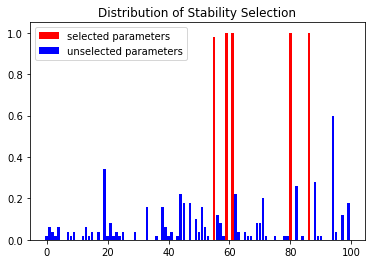

SELECTED PARAMETERS : 
55
59
61
80
86


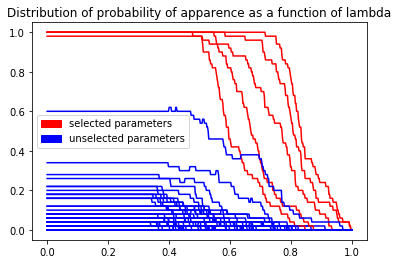

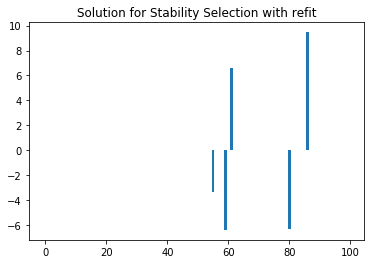

SPEEDNESS : 
Running time for Path computation    : 'not computed'
Running time for Cross Validation    : 'not computed'
Running time for Stability Selection : 1.956s
Running time for Fixed LAM           : 'not computed'

In [6]:
'''
To plot the solutions, as graphs :
'''
problem.solution

In [7]:
print(problem.solution.__dict__.keys())

print("\n To see the variables in problem ")
print(" then one can just print one of the components of problem : problem.data for example : \n")
print(problem.__dict__.keys() )

print("\n To see the formulation of the problem, either as a dictionary or as a string : \n ")
print(problem.formulation)
print(problem.formulation.__dict__)


print("\n To see the model selection, or its parameters  : \n ")
print(problem.model_selection)
print(problem.model_selection.__dict__)


print("\n To know what are the Stability Selection parameters \n (also works for Cross Validation parameters, or fixed Lam parameters)  : \n ")
print(problem.model_selection.SSparameters.__dict__)


print("\n To see what is inside the solution : \n " )

print(problem.solution.SS.__dict__.keys())


dict_keys(['PATH', 'CV', 'StabSel', 'LAMfixed'])

 To see the variables in problem 
 then one can just print one of the components of problem : problem.data for example : 

dict_keys(['label', 'data', 'formulation', 'model_selection', 'solution'])

 To see the formulation of the problem, either as a dictionary or as a string : 
 
Concomitant
{'huber': False, 'concomitant': True, 'classification': False, 'rho': 1.345, 'rho_classification': -1.0, 'e': 50.0}

 To see the model selection, or its parameters  : 
 
Stability selection, 
{'PATH': False, 'PATHparameters': Npath = 40  n_active = False  lamin = 0.011220184543019636;  numerical_method = choose, 'CV': False, 'CVparameters': Nsubset = 5  lamin = 0.001  n_lam = 500;  numerical_method = choose, 'StabSel': True, 'StabSelparameters': method = first;  lamin = 0.01;  lam = theoretical;  B = 50;  q = 10;  percent_nS = 0.5;  threshold = 0.7;  numerical_method = ODE, 'LAMfixed': False, 'LAMfixedparameters': lam = theoretical;  theoretical_la

AttributeError: 'classo_model_selection' object has no attribute 'SSparameters'

In [ ]:
'''
To solve a problem different than the default parameters :

'''
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = True
problem.formulation.concomitant             = False
problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.StabSelparameters.method = 'max'

In [ ]:
problem.solve()

In [ ]:
problem.solution

In [ ]:
problem.solution.CV.graphic(mse_max = 1.)

In [ ]:
'''
To show that the CV (also works for SS) depends only on the seed we choose :

'''
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))